# INSTRUCTIONS

This homework file has been provided to you in `.ipynb` format. You can run it on Jupyter Notebook, JupyterLab or Visual Studio Code, or you can upload it Google Colab or Amazon SageMaker Studio Lab to perform the analyses. 

You will have two questions. Most of the stuff is already provided to you. You need to read the questions and write necessary codes in the cell you are given and run ONLY those cells!

If the code you write does not work properly or it throws an Exception or an Error, you will NOT be graded!

Just in case, if you do not have any Python library, you need to install it on your system by using command `pip install <package_name>` for Python 3. You can also do it in a Jupyter cell with the command `!pip install <package_name>`.

Please after you are done, rename THIS file as follows: `MyName_MyLastName_SchoolID` and DO NOT change the format of the file, leave it as it is `.ipynb`. For example, my name is John Doe with School ID 42765 so the file name and format would be `John_Doe_42765.ipynb`. 

THANK YOU AND GOOD LUCK!

# Question 1: Simple Linear Regression

This question has been provided by Kaggle and can be downloaded from the link below:
https://www.kaggle.com/rohankayan/years-of-experience-and-salary-dataset

1. First you need to do is to download the data into your directory (`Salary_Data.csv`) and read it into Python environment using `read_csv` function of `pandas` library. This data set consists of 30 observartions and 2 variables, namely `YearsExperience` and `Salary`.
2. Secondly, please find the correlation coefficient between the variables `YearsExperience` and `Salary`. What is the correlation coefficient between the variables `YearsExperience` and `Salary`? Are they positively correlated or negatively correlated? Do not forget to to test whether this correlation coefficient is statistically significant at 95% confidence level! Use `pearsonr` function of `SciPy` library in order to do so!
3. Thirdly, please draw the scatter plot between these two variables using `matplotlib` library. Are they linearly going together?
4. For this data set, we want to create a regression function. Please tell us which variable is the independent variable (x) and which one is dependent variable (y)?
5. After you decide the independent and dependent variables, please estimate the regression parameters of the model $Y = \beta_{0} + \beta_{1} X$ by using `Scikit-Learn` library!
6. Interpret both parameters by calling `intercept_` and `coef_` attributes of the model instance you created!
7. Let's say you have a new observation (a new person) with 11 years of experience. Predict its Salary by calling `predict` instance method of the model instance you created!

**NOTES:**
1. If you would like, you can register to Kaggle website and download the `Salary_Data.csv` directly from the website OR you can use the csv file we have provided for you!
2. For those who would like to use Google Colab (https://colab.research.google.com/), you can upload the `.ipynb` file we have provided into Google Colab by clicking on `File > Upload Notebook`. 
3. Afterwards, in order to use `Salary_Data.csv` on Google Colab, you need to upload it. While you are on Jupyter notebook, please run two lines of code in an empty cell, given below:

```python
from google.colab import files
uploaded = files.upload()
```

After running this cell, an upload button will appear for you to choose the file `Salary_Data.csv`:

![](https://github.com/mmuratarat/mmuratarat.github.io/blob/master/_posts/images/ISI292_hw.png?raw=true)

Once you upload the file, it is supposed to say "100% done". Then, you are good to go and can read this CSV file into Python environment using `pandas` library!

## 1.1. Reading the Data

In [40]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data (2).csv


In [41]:
# Import necessary libraries here! 
# NOTE: ALL THE LIBRARIES YOU USED FOR THIS QUESTION SHOULD BE 
# IMPORTED IN THIS CELL!

import pandas as pd
import scipy.stats
import sklearn.linear_model
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Reading the data.

data=pd.read_csv("Salary_Data.csv")
print(data) 

    YearsExperience    Salary
0               1.1   39343.0
1               1.3   46205.0
2               1.5   37731.0
3               2.0   43525.0
4               2.2   39891.0
5               2.9   56642.0
6               3.0   60150.0
7               3.2   54445.0
8               3.2   64445.0
9               3.7   57189.0
10              3.9   63218.0
11              4.0   55794.0
12              4.0   56957.0
13              4.1   57081.0
14              4.5   61111.0
15              4.9   67938.0
16              5.1   66029.0
17              5.3   83088.0
18              5.9   81363.0
19              6.0   93940.0
20              6.8   91738.0
21              7.1   98273.0
22              7.9  101302.0
23              8.2  113812.0
24              8.7  109431.0
25              9.0  105582.0
26              9.5  116969.0
27              9.6  112635.0
28             10.3  122391.0
29             10.5  121872.0


In [43]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [44]:
data.shape

(30, 2)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## 1.2. Finding the correlation and its hypothesis test

The null hypothesis and alternative hypothesis we need to create is given below:

$$
    \begin{split}
        H_{0}&: \rho = 0 \,\,\, \text{(Correlation coefficient in the population is not statistically significant)} \\
        H_{1}&: \rho\neq 0 \,\,\, \text{(Correlation coefficient in the population is statistically significant)}
    \end{split}
$$

In [46]:
# Compute Correlation Coefficient HERE!

corr,_=scipy.stats.pearsonr(data["YearsExperience"],data["Salary"])
print('Pearson correlation coefficient:{}'.format(round(corr,6)))

a=scipy.stats.ttest_ind(data["YearsExperience"],data["Salary"])
print("p_value:{}".format(round(a[1])))

Pearson correlation coefficient:0.978242
p_value:0


**RESULT OF HYPOTHESIS TESTING AND INTERPRETATION OF CORRELATION COEFFICIENT**: WRITE HERE!

We found the p-value as 0. We can not reject H0 hypothesis and that means correlation coefficent in the population is not statistically significant.

## 1.3. Scatter Plot Between `YearsExperience` and `Salary`

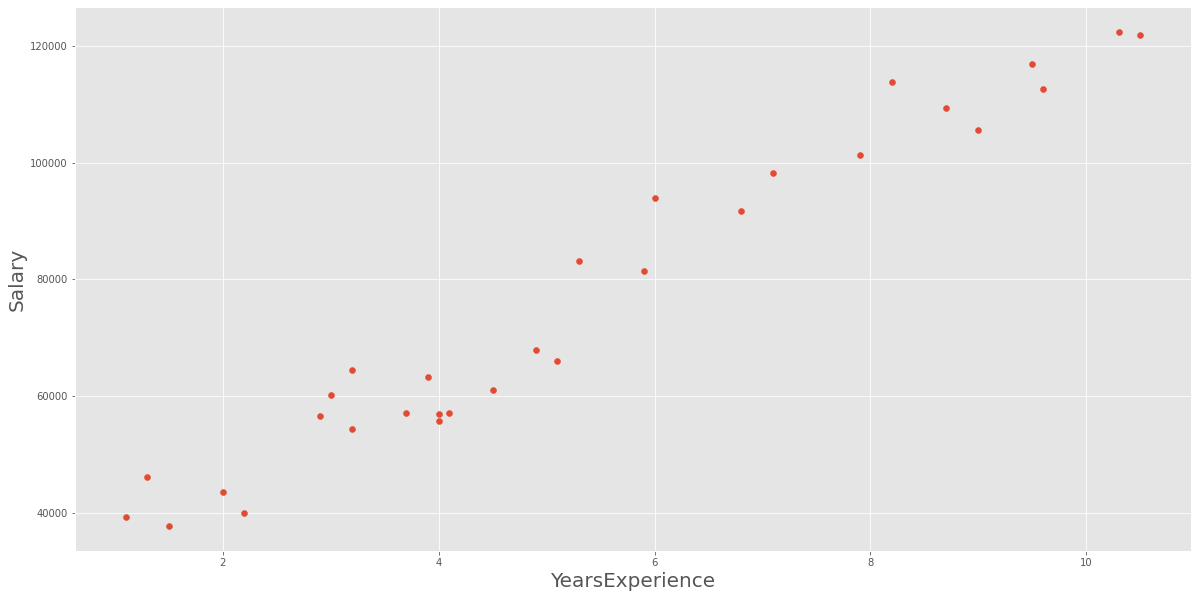

In [47]:
# Draw Scatter Plot HERE!

plt.rcParams["figure.figsize"]=(20,10)
x=np.array(data["YearsExperience"])

y=np.array(data["Salary"])
plt.style.use("ggplot")
ax=plt.gca()

plt.xlabel("YearsExperience",fontsize=20)
plt.ylabel("Salary",fontsize=20)

plt.scatter(x,y)
plt.show()


**Interpretation of the Scatter Plot above**: WRITE HERE!

## 1.4. Finding the independent variable (x) and dependent variable (y)

WRITE HERE!

Experience was designated as the independent variable in this equation since it was the variable whose influence on the other variable was to be examined. Salary, on the other hand, was designated as the dependent variable since the influence of the other variable on it was the variable under study.

## 1.5. Finding the Regression Model!

In [48]:
# Perform Regression Analysis HERE!

exp=np.array(data["YearsExperience"]).reshape(-1,1)
sal=np.array(data["Salary"])

model=sklearn.linear_model.LinearRegression(fit_intercept=True)
model.fit(exp,sal)

LinearRegression()

In [49]:
# Bias term / intercept

model.intercept_

25792.200198668696

In [50]:
# The estimated coefficient of independent variable

model.coef_

array([9449.96232146])

So the model is:
    
WRITE THE MODEL EQUATION HERE!

Y = β0 + β1

X1=25792.200198668696 + 9449.96232146X1

## 1.6. Interpret the coefficients

WRITE HERE!

The independent variable, experience, explains 85 percent of the change in wage, which is the dependent variable.

## 1.7. Predicting a new data

In [51]:
new_data=np.linspace(start=11, stop=50, num=1)  #If you need a particular estimate, I've written the code for it. If we want to see all of the predictions, we may use result.fitted values or result.predict.
model.predict(new_data.reshape(-1, 1))

array([129741.78573467])

The salary of this person will be 12,9741.78 dollars!

# Question 2: One-way Analysis of Variance

According to a study, calorie values in beef, poultry and fish meat were measured. The results obtained are as follows.

| Beef | Poultry | Fish |
|:----:|:-------:|:----:|
|  110 |    60   |  40  |
|  110 |    60   |  45  |
|  130 |    60   |  45  |
|  130 |    70   |  45  |
|  140 |    70   |  50  |
|  150 |    70   |  50  |
|  160 |    80   |  55  |
|  160 |    90   |  57  |
|  170 |    90   |  60  |
|  170 |   100   |  60  |
|  175 |   100   |  70  |
|  180 |   100   |  80  |
|  180 |   110   |  80  |
|  180 |   110   |  81  |
|  190 |   110   |  90  |
|  190 |   120   |  95  |
|  190 |   120   |  100 |
|  200 |   130   |  100 |
|  210 |   140   |  110 |
|  230 |   150   |  110 |

Investigate whether the calorie values in meat differ according to animal species at the 95% confidence level.

1. Firstly please read the data into Python environment.
2. Secondly, please run a Bartlett test to investigate whether the Assumption of Homogeneity of Variance holds for this data! DO NOT forget to write the hypotheses and interpret the p-value and put the concluding remarks!
3. Run the One-way analysis of variance (ANOVA) with the hypotheses provided, by using `f_oneway` function of `statsmodels` library!
4. If you reject the null hypothesis of ANOVA, please perform a Tukey pos-hoc test by using `pairwise_tukeyhsd` function of `statsmodels.stats.multicomp` module!

## 2.1. Reading the Data

In [52]:
# Import necessary libraries here! 
# NOTE: ALL THE LIBRARIES YOU USED FOR THIS QUESTION SHOULD BE 
# IMPORTED IN THIS CELL!

import pandas as pd
from scipy.stats import bartlett
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [53]:
# Reading the data

data={'Beef':    [110,110,130,130,140,150,160,160,170,170,175,180,180,180,190,190,190,200,210,230], 
    'Poultry': [60,60,60,70,70,70,80,90,90,100,100,100,110,110,110,120,120,130,140,150], 
    'Fish':    [40,45,45,45,50,50,55,57,60,60,70,80,80,81,90,95,100,100,110,110]}

df=pd.DataFrame(data)
df

,Beef,Poultry,Fish
0,110,60,40
1,110,60,45
2,130,60,45
3,130,70,45
4,140,70,50
5,150,70,50
6,160,80,55
7,160,90,57
8,170,90,60
9,170,100,60


## 2.2. Assumption of Homogeneity of Variance

The null hypothesis and alternative hypothesis are given by:
$$    
\begin{split}
        H_{0}&: \sigma^{2}_{\text{beef}} = \sigma^{2}_{\text{poultry}} = \sigma^{2}_{\text{fish}} \\
        H_{1}&: \textrm{At least one $\sigma^{2}_{i}$ is different from the others}
\end{split}
$$

In [54]:
# Perform Bartlett Test HERE!

from scipy.stats import bartlett
stat, p=bartlett(df["Beef"], df["Poultry"], df["Fish"])

print(stat)
print(p)

1.7609015641920143
0.4145959771078106


**INTERPRETATION**: WRITE HERE!

p-value is 0.4145 and we choose α as 0.05. So p>α and that means H0 hypothesis can not rejected.

## 2.3. One-way ANOVA

Here, it is tested whether there is a difference between the means of populations for the group consisting of 3 levels. ince there is only one independent variable (factor), the one-way analysis of variance test is an appropriate statistical test.


The null hypothesis and counter-hypothesis to be established for one-way analysis of variance are as follows:

$H_{0}: \mu_{Beef}=\mu_{Poultry}=\mu_{Fish}=\mu$ (There is NO difference between animal species in terms of caloric value in meat.

$H_{1}$: At least one $\mu_{\mathrm{j}}$ is different from the others. (There is difference between animal species in terms of caloric value in meat).

Confidence level is $1 - \alpha = \%95$. So the significance level of the test is $\alpha=0.05$. The p-value obtained as a result of the test is compared with this $\alpha$ value and the result is interpreted.

In [58]:
# Perform One-way ANOVA HERE!

from scipy.stats import f_oneway
fvalue, pvalue=f_oneway(df["Beef"], df["Poultry"], df["Fish"])

print(fvalue,pvalue)

64.89565877497874 2.0359534840676016e-15


**INTERPRETATION**: WRITE HERE!

We found p-value as 2.0359534840676016e-15. So p<α and that means H0 hypothesis is rejected.

## 2.4. Pos-Hoc Test

Since we found the differences between means, we need to figure out which meat type is different from others. In order to do so, we need to perform a post-hoc test. Here we are going to use Tukey test. Before doing so, please run the cell below since `pairwise_tukeyhsd` function of `statsmodels` library accepts long-formatted data:

In [56]:
#pd.melt: Unpivot a DataFrame from wide to long format,
df_melt = pd.melt(df.reset_index(), 
                  id_vars=['index'], 
                  value_vars=['Beef', 'Poultry', 'Fish'])

df_melt.columns = ['index', 'treatments', 'value']
df_melt

,index,treatments,value
0,0,Beef,110
1,1,Beef,110
2,2,Beef,130
3,3,Beef,130
4,4,Beef,140
5,5,Beef,150
6,6,Beef,160
7,7,Beef,160
8,8,Beef,170
9,9,Beef,170


In [57]:
# Perform Tukey Test HERE!

df_melt=pd.melt(df.reset_index(), id_vars=["index"], value_vars=["Beef", "Poultry","Fish"])
df_melt.columns=["index","treatments","value"]

tukey=pairwise_tukeyhsd(endog=df_melt["value"],
                        groups=df_melt["treatments"],
                        alpha=0.05)

print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1  group2 meandiff p-adj    lower    upper   reject
--------------------------------------------------------
  Beef    Fish    -96.6  0.001 -117.7261 -75.4739   True
  Beef Poultry   -70.75  0.001  -91.8761 -49.6239   True
  Fish Poultry    25.85 0.0128    4.7239  46.9761   True
--------------------------------------------------------


**INTERPRETATION**: WRITE HERE!

When we look at the Tukey Test's reject results there is a calorie difference between Beef,Fish and Poultry's.